https://www.kaggle.com/datasets/pratyushpuri/sports-betting-predictive-analysis-dataset

## 1. Dataset Information

This comprehensive synthetic dataset contains 1,369 rows and 10 columns specifically designed for predictive modeling in sports betting analytics. The dataset provides a rich foundation for machine learning applications in the sports betting domain, featuring realistic match data across multiple sports with comprehensive betting odds, team information, and outcome predictions.

## 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글꺠짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("G:\내 드라이브\DArtB\Kaggle Study\Sports_Betting_Predictive_Analysis\sports_betting_predictive_analysis.csv")

In [3]:
accuracy = (df['Predicted_Winner'] == df['Actual_Winner']).mean() * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")

Prediction Accuracy: 43.97%


- Football과 Hockey에서만 무승부 존재 -> 예측 정확도가 떨어지는 원인일지도

### 2.1. 결측치 분석

In [4]:
# 'Home_Team_Odds' 컬럼에서 NaN 값의 개수를 계산합니다.
nan_count = df['Home_Team_Odds'].isna().sum()

print(f"Home_Team_Odds 컬럼에 NaN 값이 있는 행의 수: {nan_count}개\n")

# 'Away_Team_Odds' 컬럼에서 NaN 값의 개수를 계산합니다.
nan_count = df['Away_Team_Odds'].isna().sum()

print(f"Away_Team_Odds 컬럼에 NaN 값이 있는 행의 수: {nan_count}개\n")

# Filter the DataFrame for 'Football' and 'Hockey' sports
df_football_hockey = df[df['Sport'].isin(['Football', 'Hockey'])]

# Count NaN values in 'Draw_Odds' for the filtered DataFrame
draw_odds_nan_count = df_football_hockey['Draw_Odds'].isna().sum()

print(f"Football and Hockey 종목에서 Draw_Odds 컬럼에 NaN 값이 있는 행의 수: {draw_odds_nan_count}개\n")

Home_Team_Odds 컬럼에 NaN 값이 있는 행의 수: 71개

Away_Team_Odds 컬럼에 NaN 값이 있는 행의 수: 87개

Football and Hockey 종목에서 Draw_Odds 컬럼에 NaN 값이 있는 행의 수: 30개



### 2.2. 예측 승률 계산

In [5]:
import pandas as pd
import numpy as np

# 1. 배당률(Odds) 컬럼을 확률(Probability) 컬럼으로 변환
# Home_Team_Odds가 NaN이 아닌 경우에만 계산하고, NaN인 경우에는 NaN으로 유지
df['Home_Team_Odds_Probability'] = df['Home_Team_Odds'].apply(lambda x: 1 / x if pd.notna(x) and x != 0 else np.nan)

# Away_Team_Odds가 NaN이 아닌 경우에만 계산하고, NaN인 경우에는 NaN으로 유지
df['Away_Team_Odds_Probability'] = df['Away_Team_Odds'].apply(lambda x: 1 / x if pd.notna(x) and x != 0 else np.nan)

# 'Draw_Odds' 컬럼이 데이터프레임에 존재하는지 확인하여 Draw_Odds_Probability 컬럼 생성
if 'Draw_Odds' in df.columns:
    df['Draw_Odds_Probability'] = df['Draw_Odds'].apply(lambda x: 1 / x if pd.notna(x) and x != 0 else np.nan)
    print("새로운 확률 컬럼이 추가되었습니다: 'Home_Team_Odds_Probability', 'Away_Team_Odds_Probability', 'Draw_Odds_Probability'")
else:
    print("Draw_Odds 컬럼이 없어 'Draw_Odds_Probability' 컬럼은 추가되지 않았습니다.")
    print("새로운 확률 컬럼이 추가되었습니다: 'Home_Team_Odds_Probability', 'Away_Team_Odds_Probability'")

print("\n---")

# 2. 모든 확률을 합산하여 'Total_Implied_Probability' 컬럼 생성
# 필요한 확률 컬럼들을 리스트로 정의
probability_columns = ['Home_Team_Odds_Probability', 'Away_Team_Odds_Probability']
if 'Draw_Odds_Probability' in df.columns:
    probability_columns.append('Draw_Odds_Probability')

# 선택된 확률 컬럼들의 NaN 값을 0으로 채운 후 행별로 합산
df['Total_Implied_Probability'] = df[probability_columns].fillna(0).sum(axis=1)

print("새로운 컬럼 'Total_Implied_Probability'가 추가되었습니다.")

# 결과 확인 (새로운 컬럼들과 원본 배당률 컬럼들을 함께 상위 5개 행 출력)
print("\n확률 및 합산 컬럼이 추가된 데이터프레임의 상위 5개 행:")
if 'Draw_Odds' in df.columns:
    print(df[['Home_Team_Odds', 'Home_Team_Odds_Probability',
              'Away_Team_Odds', 'Away_Team_Odds_Probability',
              'Draw_Odds', 'Draw_Odds_Probability',
              'Total_Implied_Probability']].head())
else:
    print(df[['Home_Team_Odds', 'Home_Team_Odds_Probability',
              'Away_Team_Odds', 'Away_Team_Odds_Probability',
              'Total_Implied_Probability']].head())

새로운 확률 컬럼이 추가되었습니다: 'Home_Team_Odds_Probability', 'Away_Team_Odds_Probability', 'Draw_Odds_Probability'

---
새로운 컬럼 'Total_Implied_Probability'가 추가되었습니다.

확률 및 합산 컬럼이 추가된 데이터프레임의 상위 5개 행:
   Home_Team_Odds  Home_Team_Odds_Probability  Away_Team_Odds  \
0            3.62                    0.276243            3.99   
1            1.84                    0.543478             NaN   
2            3.93                    0.254453            3.29   
3            3.70                    0.270270            3.61   
4            2.26                    0.442478            2.52   

   Away_Team_Odds_Probability  Draw_Odds  Draw_Odds_Probability  \
0                    0.250627        NaN                    NaN   
1                         NaN        NaN                    NaN   
2                    0.303951        NaN                    NaN   
3                    0.277008        NaN                    NaN   
4                    0.396825        NaN                    NaN   

   Total_Implied_P

In [6]:
# 'Predicted_Winner'가 'Draw'이거나 'Actual_Winner'가 'Draw'인 행들을 필터링합니다.
draw_matches = df[(df['Predicted_Winner'] == 'Draw') | (df['Actual_Winner'] == 'Draw')].copy()

print("Predicted_Winner 또는 Actual_Winner가 'Draw'인 경기들:")
print(draw_matches.head())

# (옵션) 필터링된 데이터프레임의 크기 확인
print(f"\n'Draw' 결과가 포함된 총 경기 수: {len(draw_matches)}개")

# (옵션) 'Draw' 결과가 포함된 경기들의 Sport 분포 확인
print("\n'Draw' 결과가 포함된 경기들의 스포츠 종목별 분포:")
print(draw_matches['Sport'].value_counts())

Predicted_Winner 또는 Actual_Winner가 'Draw'인 경기들:
   Match_ID        Date     Sport          Home_Team           Away_Team  \
11   M00012  2024-11-03    Hockey  Brownmouth Tigers   Smithmouth Wolves   
17   M00018  2024-03-23  Football   Lake Corey Bears  Lorettaland Wolves   
18   M00019  2025-04-07  Football  Port Sharon Lions   Torresland Tigers   
22   M00023  2024-04-10  Football    Kevinland Lions   South Adam Wolves   
24   M00025  2024-04-30  Football   Terryhaven Lions      New Lisa Lions   

    Home_Team_Odds  Away_Team_Odds  Draw_Odds  Predicted_Winner  \
11            4.79            2.43       4.12              Draw   
17            1.40            2.25       4.28  Lake Corey Bears   
18            3.57            1.50       1.62              Draw   
22            4.83            1.61       4.27              Draw   
24            4.51            4.07       3.03              Draw   

        Actual_Winner  Home_Team_Odds_Probability  Away_Team_Odds_Probability  \
11  Brownmo

In [10]:
# 'Predicted_Winner'와 'Actual_Winner'가 일치하는지 비교하여 'Prediction_Match' 컬럼 생성
df['Prediction_Match'] = (df['Predicted_Winner'] == df['Actual_Winner']).astype(int)

print("새로운 컬럼 'Prediction_Match'가 추가되었습니다.")

# 결과 확인: 'Prediction_Match' 컬럼이 추가된 데이터프레임의 상위 5개 행 출력
print("\n'Prediction_Match' 컬럼이 추가된 데이터프레임의 상위 5개 행:")
print(df[['Predicted_Winner', 'Actual_Winner', 'Prediction_Match']].head())

# (옵션) 'Prediction_Match' 컬럼의 값 분포 확인 (0과 1의 개수)
print("\n'Prediction_Match' 컬럼의 값 분포:")
print(df['Prediction_Match'].value_counts())

새로운 컬럼 'Prediction_Match'가 추가되었습니다.

'Prediction_Match' 컬럼이 추가된 데이터프레임의 상위 5개 행:
      Predicted_Winner         Actual_Winner  Prediction_Match
0  Hernandezfurt Lions   Hernandezfurt Lions                 1
1      Rothstad Wolves       Rothstad Wolves                 1
2     Aliciaport Lions      Aliciaport Lions                 1
3     Simonshire Lions  Lake Samantha Eagles                 0
4   Williamsfurt Bears    Brendanport Eagles                 0

'Prediction_Match' 컬럼의 값 분포:
Prediction_Match
0    767
1    602
Name: count, dtype: int64


스포츠 종목별 예측 정확도:
------------------------------
Basketball: 51.71%
Baseball: 52.77%
Tennis: 47.84%
Hockey: 31.78%
Football: 34.44%
------------------------------


C:\Users\luke\AppData\Local\Temp\ipykernel_69616\3238117123.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_accuracy_series.index, y=sport_accuracy_series.values, palette='coolwarm')


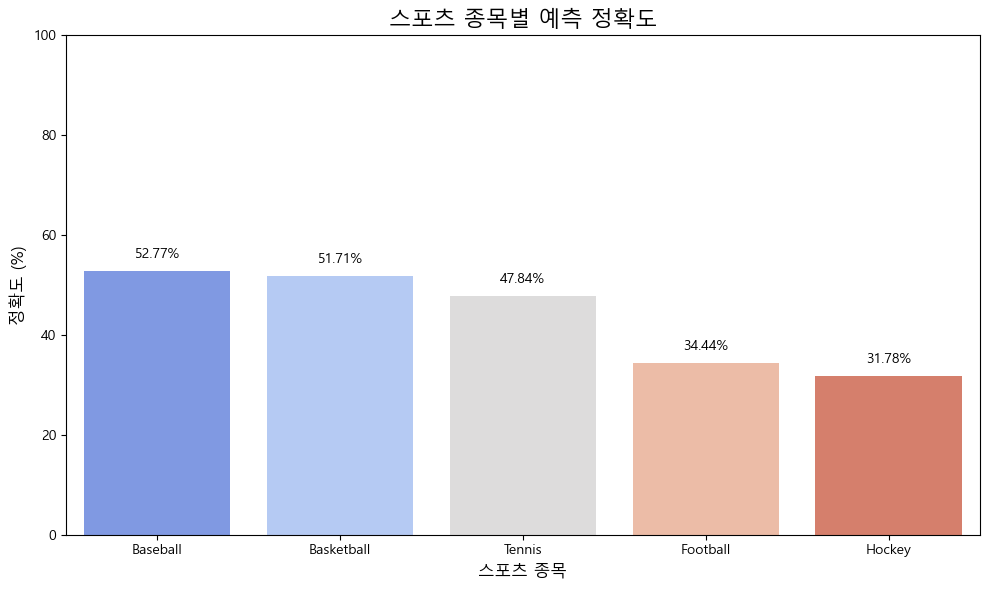

In [7]:
# 스포츠 종목별 정확도를 저장할 딕셔너리 초기화
sport_accuracy = {}

# 'Sport' 컬럼의 고유한 값(즉, 각 스포츠 종목)들을 가져옵니다.
unique_sports = df['Sport'].unique()

print("스포츠 종목별 예측 정확도:")
print("-" * 30)

# 각 스포츠 종목에 대해 반복합니다.
for sport in unique_sports:
    # 현재 스포츠 종목에 해당하는 데이터만 필터링합니다.
    df_sport = df[df['Sport'] == sport]

    # 해당 스포츠 종목 내에서 'Predicted_Winner'와 'Actual_Winner'가 일치하는 비율을 계산합니다.
    # (df_sport['Predicted_Winner'] == df_sport['Actual_Winner'])는 True/False 시리즈를 반환하고,
    # .mean()은 True(1)의 비율을 계산하여 정확도를 얻습니다.
    accuracy = (df_sport['Predicted_Winner'] == df_sport['Actual_Winner']).mean() * 100

    # 결과를 딕셔너리에 저장하고 출력합니다.
    sport_accuracy[sport] = accuracy
    print(f"{sport}: {accuracy:.2f}%")

print("-" * 30)

# (옵션) 스포츠 종목별 정확도를 시각화하여 비교하기 쉽게 할 수도 있습니다.
# 위에서 구한 sport_accuracy 딕셔너리를 Pandas Series로 변환
sport_accuracy_series = pd.Series(sport_accuracy).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sport_accuracy_series.index, y=sport_accuracy_series.values, palette='coolwarm')
plt.title('스포츠 종목별 예측 정확도', fontsize=16)
plt.xlabel('스포츠 종목', fontsize=12)
plt.ylabel('정확도 (%)', fontsize=12)
plt.ylim(0, 100) # 정확도는 0에서 100 사이이므로 y축 범위 설정

# 각 막대 위에 정확도 값 표시
for index, value in enumerate(sport_accuracy_series.values):
    plt.text(index, value + 2, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\luke\AppData\Local\Temp\ipykernel_69616\3934635746.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_counts.index, y=match_counts.values, palette='coolwarm')


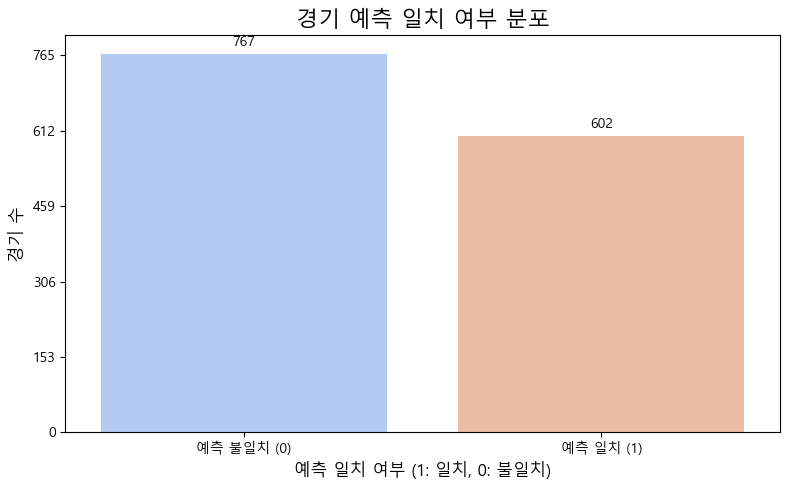

In [11]:
if 'Prediction_Match' in df.columns:
    # 'Prediction_Match' 컬럼의 값(0 또는 1)별 빈도수를 계산합니다.
    match_counts = df['Prediction_Match'].value_counts()

    # 결과를 보기 좋게 정렬합니다 (예: 1(맞음), 0(틀림) 순서로)
    # 인덱스가 0과 1이므로, 0과 1이 모두 있는지 확인하고 순서를 지정합니다.
    order = [1, 0] # 예측이 맞은 경우(1)를 먼저 보여주고, 틀린 경우(0)를 다음에 보여줍니다.
    # reindex를 사용하여 순서를 강제하고, 만약 특정 값이 없으면 NaN으로 채워집니다.
    match_counts = match_counts.reindex(order, fill_value=0)


    # 막대 그래프를 그립니다.
    plt.figure(figsize=(8, 5)) # 그래프 크기 설정
    sns.barplot(x=match_counts.index, y=match_counts.values, palette='coolwarm')

    # 그래프 제목과 축 라벨 설정
    plt.title('경기 예측 일치 여부 분포', fontsize=16)
    plt.xlabel('예측 일치 여부 (1: 일치, 0: 불일치)', fontsize=12)
    plt.ylabel('경기 수', fontsize=12)

    # x축 라벨을 더 명확하게 변경
    plt.xticks([0, 1], ['예측 불일치 (0)', '예측 일치 (1)'], fontsize=10)

    # y축 눈금을 정수형으로 표시
    # 최대값에 여유를 주어 텍스트가 잘 보이도록 합니다.
    plt.yticks(np.arange(0, max(match_counts.values) + max(10, max(match_counts.values) * 0.1), max(50, max(match_counts.values) // 5)))
    plt.ticklabel_format(style='plain', axis='y') # 지수 표기법 방지

    # 각 막대 위에 정확한 경기 수 표시
    for index, value in enumerate(match_counts.values):
        # x축 라벨 순서에 맞춰 인덱스 조정 (reindex로 인해 이미 순서가 맞춰져 있을 수 있음)
        # 여기서는 match_counts.index를 직접 사용합니다.
        plt.text(match_counts.index[index], value + 10, str(value), ha='center', va='bottom', fontsize=10)

    plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
    plt.show() # 그래프 표시

else:
    print("'Prediction_Match' 컬럼이'df'에 존재하지 않습니다. 먼저 이 컬럼을 생성해 주세요.")
    print("예시: df['Prediction_Match'] = (df['Predicted_Winner'] == df['Actual_Winner']).astype(int)")



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 예시로 사용할 모델

# 1. 독립 변수 (X)와 종속 변수 (y) 분리
# 예시: 'Actual_Winner'를 예측하기 위한 모델을 만든다고 가정
# 예측에 필요 없는 컬럼들 (e.g., 'Match_ID')을 drop_cols 리스트에 추가
drop_cols = ['Match_ID', 'Predicted_Winner', 'Actual_Winner']
X = df.drop(drop_cols, axis=1)
y = df['Actual_Winner']

# 2. 전체 데이터를 훈련 세트와 테스트 세트로 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 훈련 데이터와 테스트 데이터를 무승부 여부에 따라 다시 분리
# 무승부 스포츠 목록 정의 (df['Sport'] 컬럼에 이 값들이 있어야 함)
draw_sports = ['Soccer', 'Hockey']

# 훈련 데이터 분리
train_draw_mask = X_train['Sport'].isin(draw_sports)
X_train_draw = X_train[train_draw_mask]
y_train_draw = y_train[train_draw_mask]
X_train_no_draw = X_train[~train_draw_mask]
y_train_no_draw = y_train[~train_draw_mask]

# 테스트 데이터 분리
test_draw_mask = X_test['Sport'].isin(draw_sports)
X_test_draw = X_test[test_draw_mask]
y_test_draw = y_test[test_draw_mask]
X_test_no_draw = X_test[~test_draw_mask]
y_test_no_draw = y_test[~test_draw_mask]

# 분리 결과 확인
print("훈련 데이터 (무승부 가능 스포츠) 크기:", X_train_draw.shape, y_train_draw.shape)
print("훈련 데이터 (무승부 불가능 스포츠) 크기:", X_train_no_draw.shape, y_train_no_draw.shape)
print("테스트 데이터 (무승부 가능 스포츠) 크기:", X_test_draw.shape, y_test_draw.shape)
print("테스트 데이터 (무승부 불가능 스포츠) 크기:", X_test_no_draw.shape, y_test_no_draw.shape)

# 4. 모델 학습 및 예측 (예시 코드)
# 모델 1: 무승부 가능 스포츠용 (3진 분류)
# model_draw = RandomForestClassifier(random_state=42)
# model_draw.fit(X_train_draw.drop('Sport', axis=1), y_train_draw)
# y_pred_draw = model_draw.predict(X_test_draw.drop('Sport', axis=1))

# 모델 2: 무승부 불가능 스포츠용 (2진 분류)
# model_no_draw = RandomForestClassifier(random_state=42)
# model_no_draw.fit(X_train_no_draw.drop('Sport', axis=1), y_train_no_draw)
# y_pred_no_draw = model_no_draw.predict(X_test_no_draw.drop('Sport', axis=1))

# 이후 단계에서 각 모델의 성능을 따로 평가하면 됩니다.

훈련 데이터 (무승부 가능 스포츠) 크기: (207, 12) (207,)
훈련 데이터 (무승부 불가능 스포츠) 크기: (888, 12) (888,)
테스트 데이터 (무승부 가능 스포츠) 크기: (51, 12) (51,)
테스트 데이터 (무승부 불가능 스포츠) 크기: (223, 12) (223,)


## 3.lazypredict를 이용해 처리 전 예측

In [15]:
pip install lazypredict

  Using cached lazypredict-0.2.16-py2.py3-none-any.whl (14 kB)
  Using cached pytest_runner-6.0.1-py3-none-any.whl (7.2 kB)
  Using cached mlflow-3.1.4-py3-none-any.whl (24.7 MB)
     -------------------------------------- 103.3/103.3 KB 3.0 MB/s eta 0:00:00
  Using cached docker-7.1.0-py3-none-any.whl (147 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl (114 kB)
  Using cached waitress-3.0.2-py3-none-any.whl (56 kB)
  Using cached mlflow_skinny-3.1.4-py3-none-any.whl (1.9 MB)
  Using cached gitpython-3.1.45-py3-none-any.whl (208 kB)
  Using cached cachetools-6.1.0-py3-none-any.whl (11 kB)
     -------------------------------------- 120.0/120.0 KB 3.5 MB/s eta 0:00:00
  Using cached uvicorn-0.35.0-py3-none-any.whl (66 kB)
     -------------------------------------- 435.3/435.3 KB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 64.8/64.8 KB ? eta 0:00:00
     ---------------------------------------- 65.6/65.6 KB 3.7 MB/s eta 0:00:00
  Using cached fastapi-0.116

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# 예측에 사용할 독립 변수 (X)와 종속 변수 (y) 분리
# 예시: 'Actual_Winner'를 예측한다고 가정
# 'Predicted_Winner'와 'Actual_Winner'는 예측에 사용하지 않으므로 제외
X = df.drop(['Predicted_Winner', 'Actual_Winner'], axis=1)
y = df['Actual_Winner']

# 범주형 컬럼(Home_Team, Away_Team, Sport)을 원-핫 인코딩으로 변환
X_encoded = pd.get_dummies(X, columns=['Home_Team', 'Away_Team', 'Sport'], dummy_na=False)

# 인코딩된 데이터의 상위 5개 행과 컬럼 수 확인
print("인코딩 후 데이터프레임의 상위 5개 행:")
print(X_encoded.head())
print("\n변환된 컬럼 개수:", X_encoded.shape[1])

인코딩 후 데이터프레임의 상위 5개 행:
  Match_ID        Date  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
0   M00001  2024-01-24            3.62            3.99        NaN   
1   M00002  2025-05-03            1.84             NaN        NaN   
2   M00003  2025-04-10            3.93            3.29        NaN   
3   M00004  2024-08-02            3.70            3.61        NaN   
4   M00005  2024-10-05            2.26            2.52        NaN   

   Home_Team_Odds_Probability  Away_Team_Odds_Probability  \
0                        0.28                        0.25   
1                        0.54                         NaN   
2                        0.25                        0.30   
3                        0.27                        0.28   
4                        0.44                        0.40   

   Draw_Odds_Probability  Total_Implied_Probability  Prediction_Match  ...  \
0                    NaN                       0.53                 1  ...   
1                    NaN               

In [19]:
pip install --upgrade ipywidgets jupyter

     -------------------------------------- 139.8/139.8 KB 4.0 MB/s eta 0:00:00
     -------------------------------------- 216.6/216.6 KB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 258.5/258.5 KB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 12.3/12.3 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 14.3/14.3 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 73.5/73.5 KB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 59.7/59.7 KB 3.3 MB/s eta 0:00:00
     -------------------------------------- 386.9/386.9 KB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 69.4/69.4 KB 3.7 MB/s eta 0:00:00
     -------------------------------------- 187.3/187.3 KB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB ? eta 0:00:00
     -------------------------------------- 163.4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [20]:
# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# LazyClassifier 객체 생성
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# 모든 모델을 훈련하고 평가
# predictions: 각 모델의 예측값
# models: 각 모델의 성능 지표 (정확도, F1-Score 등)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 결과 출력
print("\nLazyPredict 결과:")
print(models)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html